# Assignment7

### Abstract
The aim of this lab is to solve ODE:

$$\frac{d^2y}{dx^2}=-1001\frac{dy}{dx}-1000y$$

ODE must be solved in the region from $x=0$ to $x=5$, with initial conditions $y(0)=1$ and $y'(0)=0$ using four different methods:

<b>1)the explicit Euler method

2)Heun’s method 

3)the midpoint method

4)the implicit Euler method.</b>

First step to solve this equation is to divide into two first order differential equations:
$$\frac{dy}{dx}=z$$ and $$\frac{dz}{dy}=-1000z-1000y$$

So, first of all lest find exact solution. This problem has an analytical solution:

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x,y,z):
    return -1001*z - 1000*y
def y_exact(x):
    return (1001/999)*np.exp(-x)-(1/999)*np.exp(-1000*x)

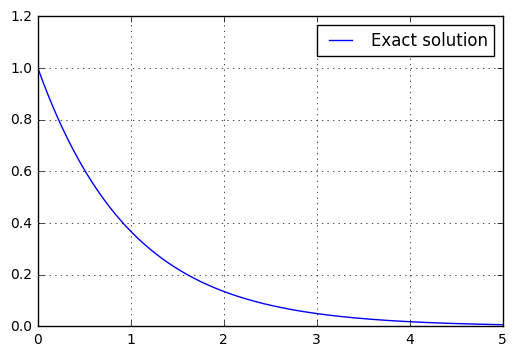

In [9]:
h = 0.0001
a = 0.0
b = 5.0
n = int((b-a)/h);
x1 = np.arange(a, b+h, h);

plt.plot(x1,y_exact(x1), label='Exact solution')
plt.legend()
plt.grid()
plt.show()

Now, lets try to solve it using listed above methods:

Using [Dr. Abdikamalov's lectures 22 and 23](https://github.com/abdik/comp_phys_nu/blob/master/jupyter_notebook_files/pythonclass_100417a.ipynb) we can solve this ODE.

First lets consider Euler's method:

In [10]:
def eul(h):
    a = 0.0
    b = 5.0
    n = int((b-a)/h)
    x = np.arange(a, b+h, h)
    
    y_eul = np.zeros(len(x), float)
    z_eul = np.zeros(len(x), float)
    y_eul[0] = 1.0
    z_eul[0] = 0.0

    for i in range(len(x)-1):
        z_eul[i+1] = z_eul[i] + f(x1[i],y_eul[i],z_eul[i])*h
        y_eul[i+1] = y_eul[i] + z_eul[i]*h
    return y_eul

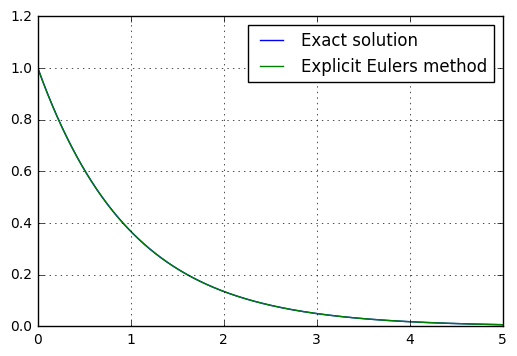

In [11]:
h= 0.0001
y = eul(h)
x = np.arange(a, b+h, h)
plt.plot(x1,y_exact(x1), label='Exact solution')
plt.plot(x,y, label='Explicit Eulers method')
plt.legend()
plt.grid()
plt.show()

Calulating error gives us:

In [12]:
err_eul=np.average((y_exact(x)-y)*100/y_exact(x))
print(err_eul)

0.112386407373


Next is the Heun's method:

In [13]:
def hen(h):
    a = 0.0
    b = 5.0
    n = int((b-a)/h)
    x = np.arange(a, b+h, h)

    y_heun = np.zeros(len(x), float)
    z_heun = np.zeros(len(x), float)
    y_heun[0]=1.0;
    z_heun[0]=0.0;

    for i in range(n-1):
        z_heun[i+1] = z_heun[i] + (f(x1[i],y_heun[i],z_heun[i])+f(x[i+1],y_heun[i]+z_heun[i]*h, z_heun[i] + f(x[i],y_heun[i],z_heun[i])*h))*(h/2)
        y_temp = z_heun[i] + f(x[i],y_heun[i],z_heun[i])*h
        y_heun[i+1]=y_heun[i]+0.5*(z_heun[i]+y_temp)*h
    return y_heun

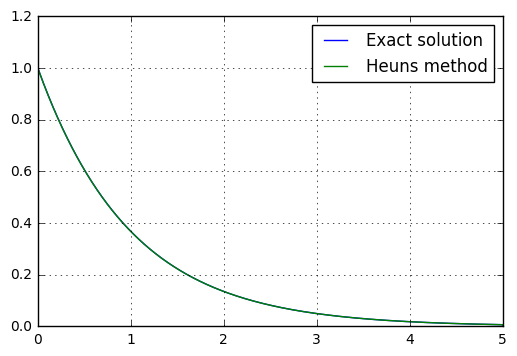

In [14]:
h = 0.0001
y = hen(h)
x = np.arange(a, b+h, h)
plt.plot(x,y_exact(x), label='Exact solution')
plt.plot(x,y, label='Heuns method')
plt.legend()
plt.grid()
plt.show()

In [15]:
err_hen=np.average((y_exact(x)-y)*100/y_exact(x))
print(err_hen)

0.101897702691


The next is the midpoint method:

In [16]:
def mp(h):
    a = 0.0
    b = 5.0
    n = int((b-a)/h)
    x = np.arange(a, b+h, h)

    y_mp = np.zeros(len(x), float)
    z_mp = np.zeros(len(x), float)
    y_mp[0]=1.0;
    z_mp[0]=0.0;

    for i in range(len(x)-1):
        y_mp[i + 1] = y_mp[i] + 0.5*(z_mp[i] + (z_mp[i] + 0.5*f(x[i],y_mp[i],z_mp[i])*h))*h
        z_mp[i+1] = z_mp[i] + 0.5*(f(x[i], y_mp[i],z_mp[i]) + f(x[i] + 0.5*h, y_mp[i] + 0.5 * z_mp[i] * h, z_mp[i] + 0.5 * f(x[i], y_mp[i], z_mp[i]) * h)) * h
    return y_mp

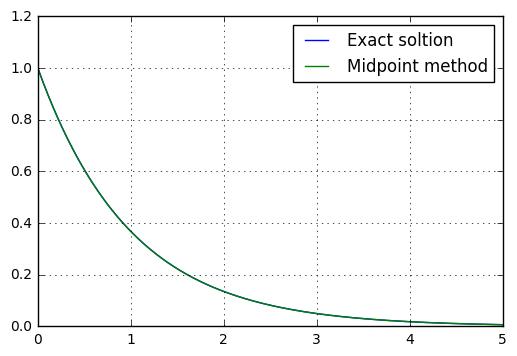

In [17]:
h = 0.0001
y = mp(h)
x = np.arange(a, b+h, h)
plt.plot(x,y_exact(x), label='Exact soltion')
plt.plot(x,y, label='Midpoint method')
plt.legend()
plt.grid()
plt.show()

In [18]:
err_mp=np.average((y_exact(x)-y)*100/y_exact(x))
print(err_mp)

0.10614332066


The last is the implicit Euler method:

In [89]:
def i_eul(h):
    a = 0.0
    b = 5.0
    n = int((b-a)/h)
    x = np.arange(a, b+h, h)

    yi_eul = np.zeros(len(x), float)
    zi_eul = np.zeros(len(x), float)
    yi_eul[0]=1.0;
    zi_eul[0]=0.0;

    for i in range(len(x)-1):
        zi_eul[i+1] = (zi_eul[i] - 1000*yi_eul[i]*h)/(1+1001*h+1000*h**2)
        yi_eul[i+1] = yi_eul[i] + zi_eul[i+1]*h
    return yi_eul

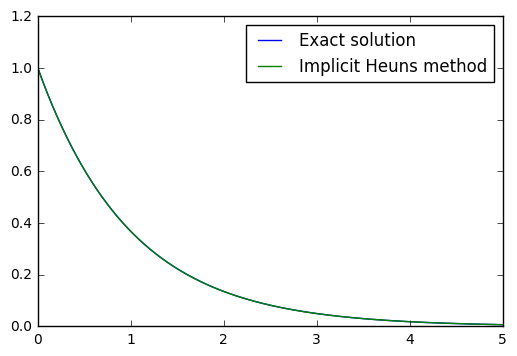

In [90]:
h = 0.0001
y = i_eul(h)
x = np.arange(a, b+h, h)
plt.plot(x1,y_exact(x), label='Exact solution')
plt.plot(x,y, label='Implicit Heuns method')
plt.legend()
plt.show()

In [88]:
err_ieul=np.average((y_exact(x)-y)*100/y_exact(x))
print(np.abs(err_ieul))

0.0874133848843


Lets compare errors from all methods. Note: stepsize used for calcualtions was 0.0001

In [59]:
print("Error of explicit Euler's method =",np.abs(err_eul))
print("Error of Heun's method =",np.abs(err_hen))
print("Error of midpoint method =",np.abs(err_mp))
print("Error of implicit Euler's method =",np.abs(err_ieul))

Error of explicit Euler's method = 0.162327061851
Error of Heun's method = 0.109879981574
Error of midpoint method = 0.131115044709
Error of implicit Euler's method = 0.0249874316051


Euler's method is simpliest but not good method, because it could lead to very huge errors in calculations. By comparing with other results we can easily see that it has less accuracy. 

The Global error for Heun's method is $O(h^2)$, local $O(h^3)$ and the same orders have a Midpoint method. It means that error order can be predicted by step size h. So theoretically for Midpoint and Heun's method we have the same order of error. And results indicates this fact.  

The best result was obtained from implicit Euler's method. Also, considering the fact that stepsize for all of the methods was equal to 0.005, and it yielded quite accurate results.


Now lets try to change the stepsize:   

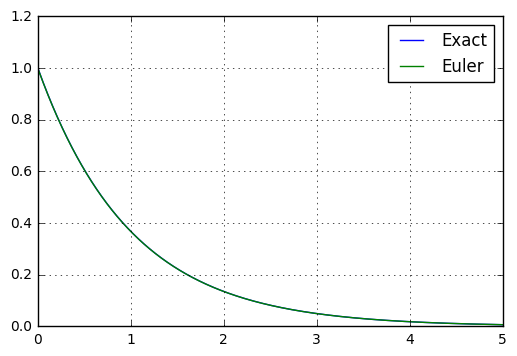

In [60]:
h= 0.0005
y = eul(h)
x = np.arange(a, b+h, h)
plt.plot(x1,y_exact(x1), label='Exact')
plt.plot(x,y, label='Euler')
plt.legend()
plt.grid()
plt.show()

In [61]:
err_eul2=np.average((y_exact(x)-y)*100/y_exact(x))
print(err_eul2)

0.162327061851


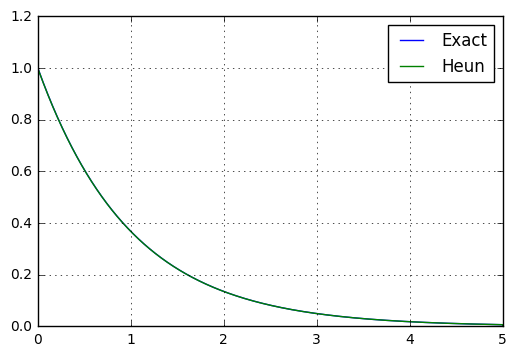

In [62]:
h = 0.0005
y = hen(h)
x = np.arange(a, b+h, h)
plt.plot(x,y_exact(x), label='Exact')
plt.plot(x,y, label='Heun')
plt.legend()
plt.grid()
plt.show()

In [63]:
err_hen2=np.average((y_exact(x)-y)*100/y_exact(x))
print(err_hen2)

0.109879981574


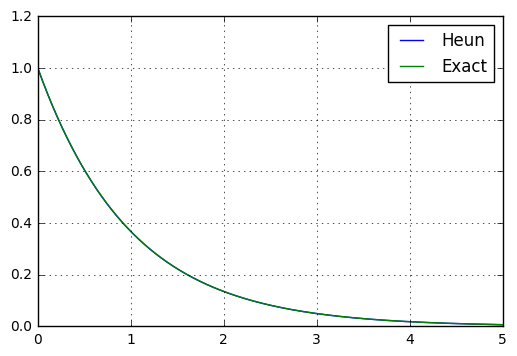

In [64]:
h = 0.0005
y = mp(h)
x = np.arange(a, b+h, h)
plt.plot(x,y, label='Heun')
plt.plot(x,y_exact(x), label='Exact')
plt.legend()
plt.grid()
plt.show()

In [65]:
err_mp2=np.average((y_exact(x)-y)*100/y_exact(x))
print(err_mp2)

0.131115044709


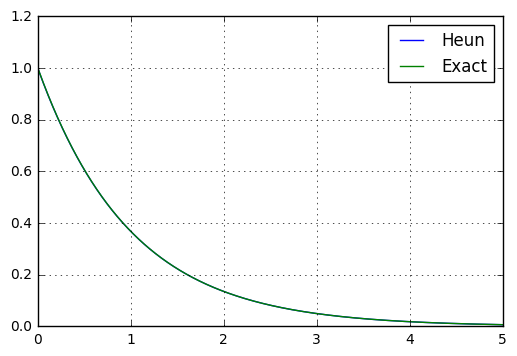

In [66]:
h = 0.0005
y = i_eul(h)
x = np.arange(a, b+h, h)
plt.plot(x,y, label='Heun')
plt.plot(x,y_exact(x), label='Exact')
plt.legend()
plt.grid()
plt.show()

In [67]:
err_ieul2=np.average((y_exact(x)-y)*100/y_exact(x))
print(np.abs(err_ieul2))

0.0374619512404


In [68]:
print("Error of explicit Euler's method =",np.abs(err_eul))
print("Error of Heun's method =",np.abs(err_hen))
print("Error of midpoint method =",np.abs(err_mp))
print("Error of implicit Euler's method =",np.abs(err_ieul))

Error of explicit Euler's method = 0.162327061851
Error of Heun's method = 0.109879981574
Error of midpoint method = 0.131115044709
Error of implicit Euler's method = 0.0249874316051


So, as can be seen from the error result, stepsize of 0.0005 which is five times begger than in previous case. Neveretheless it also yielded accurate results for methods. However it can be seen that previous stepsize gave better results.
To be more precise, lets consider the rise of error depending on stepsize:

In [85]:
def error(a,b):
    return np.average((a - b)*100/a)
def err(func):
    a=0.0
    b=5.0
    a1 = 0.0001
    b1 = 0.001
    h1=0.0001
    step = np.arange(a1, b1+h1, h1);
    e = np.zeros(len(step),float)
    
    for i in range (len(step)):
        x = np.arange(a, b+step[i], step[i]);
        y = func(step[i])
        e[i]=error(y_exact(x), y)
    #plt.figure(figsize=(20,9))
    plt.plot(step,np.abs(e), label=func)
    plt.legend()

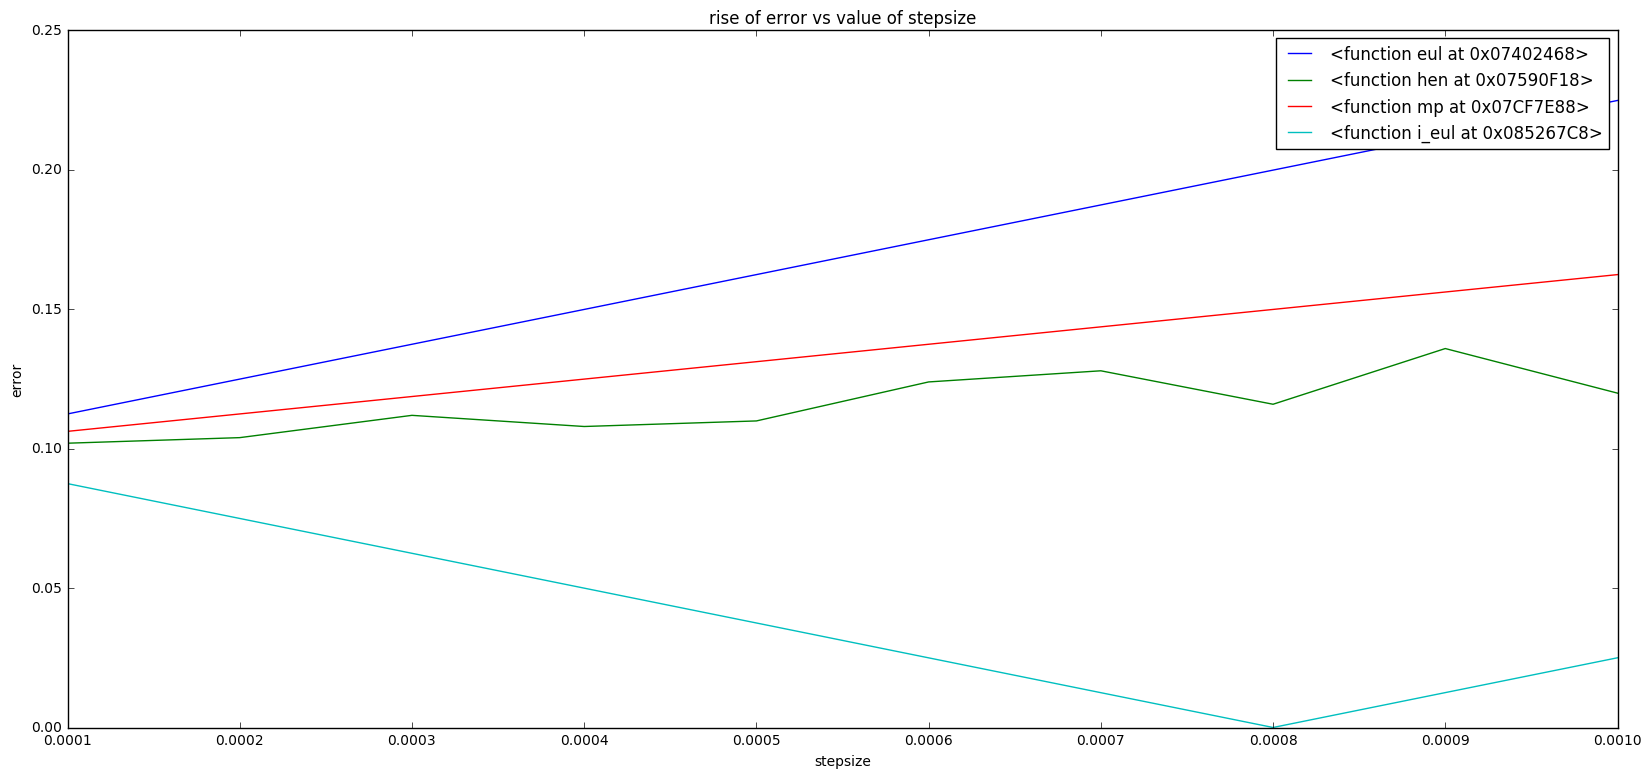

In [91]:
plt.figure(figsize=(20,9))
plt.title("rise of error vs value of stepsize")
plt.xlabel("stepsize")
plt.ylabel("error")
err(eul)
err(hen)
err(mp)
err(i_eul)

Glance at the graph reveals that general all methods have positive trend in value of error with the rise of stepsize. However, for implicit Euler's method, trend is negative untill 0.0008 and rises after.